<a href="https://colab.research.google.com/github/brainmentorspvtltd/IGDTU_ImageProcessingTF/blob/main/IG_SkinCancerImageAug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

os.environ["KAGGLE_USERNAME"] = "ravikanttyagi"
os.environ["KAGGLE_KEY"] = "095a21c789eb4728fde2b29230033273"

!kaggle datasets download nodoubttome/skin-cancer9-classesisic

 99% 775M/786M [00:09<00:00, 39.8MB/s]
100% 786M/786M [00:09<00:00, 86.1MB/s]


In [2]:
from IPython.display import clear_output

!unzip skin-cancer9-classesisic.zip

clear_output()

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.layers import LeakyReLU, Dropout, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_path = "dataset/Train"
test_path = "dataset/Test"

In [5]:
class_names = os.listdir(train_path)

In [6]:
class_names

['melanoma',
 'seborrheic keratosis',
 'dermatofibroma',
 'squamous cell carcinoma',
 'nevus',
 'vascular lesion',
 'actinic keratosis',
 'basal cell carcinoma',
 'pigmented benign keratosis']

In [7]:
for name in class_names:
  path = train_path + "/" + name
  n_images = len(os.listdir(path))
  print(name, " : ", n_images)

melanoma  :  438
seborrheic keratosis  :  77
dermatofibroma  :  95
squamous cell carcinoma  :  181
nevus  :  357
vascular lesion  :  139
actinic keratosis  :  114
basal cell carcinoma  :  376
pigmented benign keratosis  :  462


In [8]:
for name in class_names:
  path = test_path + "/" + name
  n_images = len(os.listdir(path))
  print(name, " : ", n_images)

melanoma  :  16
seborrheic keratosis  :  3
dermatofibroma  :  16
squamous cell carcinoma  :  16
nevus  :  16
vascular lesion  :  3
actinic keratosis  :  16
basal cell carcinoma  :  16
pigmented benign keratosis  :  16


In [9]:
# Pre-processing of images
image_data_gen = ImageDataGenerator(horizontal_flip=True,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    rescale=1/255.,
                                    rotation_range=30,
                                    vertical_flip=True
                                    )

In [10]:
X_train = image_data_gen.flow_from_directory(train_path, target_size=(224,224), batch_size=4, class_mode="sparse")

Found 2239 images belonging to 9 classes.


In [11]:
X_val = image_data_gen.flow_from_directory(test_path, target_size=(224,224), batch_size=4, class_mode="sparse")

Found 118 images belonging to 9 classes.


In [12]:
model = Sequential()
model.add(Conv2D(128, (3,3), input_shape=(224,224,3), activation="relu"))
model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1024, activation=LeakyReLU(0.1)))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(512, activation=LeakyReLU(0.1)))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(256, activation=LeakyReLU(0.1)))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(128, activation=LeakyReLU(0.1)))
model.add(Dense(9, activation="sigmoid"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 128)     3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 128)     147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 128)    0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      73792     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 64)       0         
 2D)                                                    

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['acc'])

history = model.fit(X_train, epochs=30, validation_data=X_val)

Epoch 1/30
560/560 [==============================] - 99s 149ms/step - loss: 2.2160 - acc: 0.2229 - val_loss: 2.2263 - val_acc: 0.1441
Epoch 2/30
560/560 [==============================] - 80s 143ms/step - loss: 2.1091 - acc: 0.2318 - val_loss: 2.3920 - val_acc: 0.1864
Epoch 3/30
560/560 [==============================] - 81s 145ms/step - loss: 2.0320 - acc: 0.2537 - val_loss: 4.1593 - val_acc: 0.0932
Epoch 4/30
560/560 [==============================] - 80s 142ms/step - loss: 1.9989 - acc: 0.2488 - val_loss: 2.3298 - val_acc: 0.2203
Epoch 5/30
560/560 [==============================] - 81s 144ms/step - loss: 1.8878 - acc: 0.2890 - val_loss: 2.2487 - val_acc: 0.2542
Epoch 6/30
560/560 [==============================] - 91s 163ms/step - loss: 1.8756 - acc: 0.3068 - val_loss: 3.1567 - val_acc: 0.1271
Epoch 7/30
560/560 [==============================] - 82s 147ms/step - loss: 1.8208 - acc: 0.3372 - val_loss: 2.2865 - val_acc: 0.2119
Epoch 8/30
560/560 [==============================] - 8

In [17]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

train_acc = history.history['acc']
val_acc = history.history['val_acc']

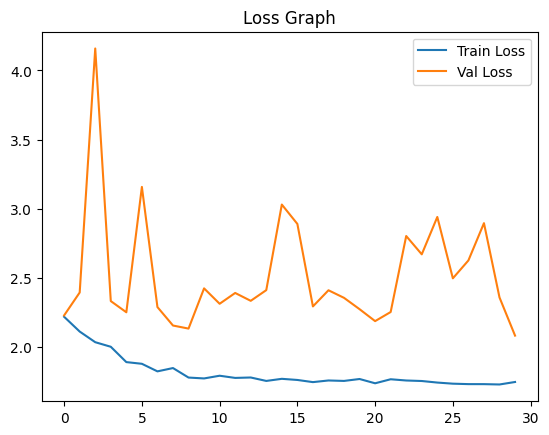

In [18]:
plt.plot(train_loss, label="Train Loss")
plt.plot(val_loss, label="Val Loss")
plt.legend()
plt.title("Loss Graph")
plt.show()

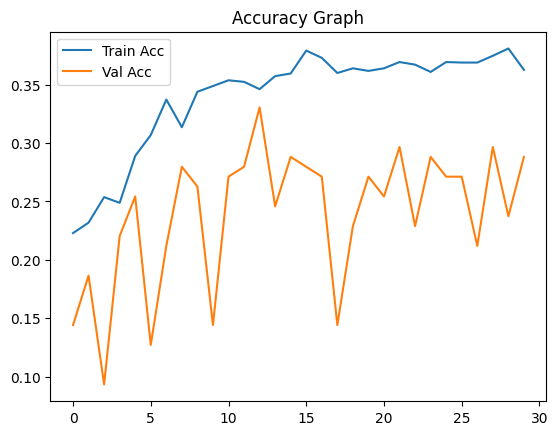

In [19]:
plt.plot(train_acc, label="Train Acc")
plt.plot(val_acc, label="Val Acc")
plt.legend()
plt.title("Accuracy Graph")
plt.show()

In [21]:
model.evaluate(X_val)

30/30 [==============================] - 11s 382ms/step - loss: 2.0843 - acc: 0.2881


In [23]:
y_pred = model.predict(X_val)

30/30 [==============================] - 11s 342ms/step


In [25]:
y_pred[0]

array([0.1674485 , 0.6018669 , 0.11264011, 0.90278685, 0.78246063,
       0.5011157 , 0.6984407 , 0.44352302, 0.0640143 ], dtype=float32)

In [27]:
y_pred = np.argmax(y_pred, axis=1)

In [28]:
y_pred

array([3, 1, 1, 4, 5, 4, 1, 1, 1, 3, 3, 1, 1, 3, 3, 1, 4, 1, 4, 3, 1, 3,
       1, 4, 3, 8, 1, 5, 4, 3, 4, 4, 4, 1, 1, 4, 1, 1, 1, 1, 4, 1, 5, 1,
       8, 1, 4, 8, 1, 1, 1, 8, 5, 1, 8, 1, 4, 3, 1, 1, 4, 3, 5, 4, 5, 5,
       1, 8, 4, 1, 5, 1, 1, 1, 1, 5, 5, 5, 1, 1, 3, 3, 4, 1, 1, 8, 5, 1,
       4, 5, 5, 3, 1, 5, 1, 4, 3, 5, 8, 5, 1, 1, 5, 1, 1, 1, 1, 5, 3, 5,
       4, 4, 5, 5, 1, 1, 3, 1])

In [32]:
y_test = next(X_val)[1]

In [33]:
y_test

array([1., 2., 2., 2.], dtype=float32)

In [34]:
len(y_test)

4

In [53]:
y_test = []
for i in range(int(X_val.n/4) + 1):
  img, labels = next(X_val)
  # print(label)
  for label in labels:
    y_test.append(label)

In [54]:
len(y_test)

118

In [55]:
len(y_pred)

118

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
confusion_matrix(y_test, y_pred)

array([[ 0,  9,  0,  2,  0,  4,  0,  0,  1],
       [ 0,  7,  0,  2,  2,  3,  0,  0,  0],
       [ 0,  6,  0,  3,  1,  3,  0,  0,  1],
       [ 0,  5,  0,  2,  6,  3,  0,  0,  1],
       [ 0, 10,  0,  3,  3,  1,  0,  0,  2],
       [ 0,  5,  0,  1,  4,  3,  0,  0,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1],
       [ 0,  8,  0,  1,  4,  4,  0,  0,  0],
       [ 0,  0,  0,  3,  0,  1,  0,  0,  1]])

In [58]:
import seaborn as sns

In [59]:
cm = confusion_matrix(y_test, y_pred)

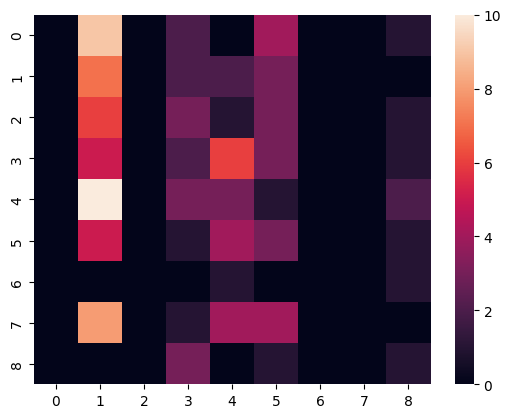

In [60]:
sns.heatmap(cm)
plt.show()